# Task 2
## UNEMPLOYMENT ANALYSIS WITH PYTHON
Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.


In [57]:
# Load required libraries
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the dataset
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [59]:
# Check the columns of the dataset
df.columns.to_list()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Region.1',
 'longitude',
 'latitude']

In [60]:
# Count the frequency of values in the 'Region.1' column
# df['Region.1'].value_counts()

# Count the frequency of values in the 'Region' column
df['Region'].value_counts()


Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [61]:
# Count the missing values in the dataset
df.isnull().sum()
# Count the duplicated rows in the dataset
df.duplicated().sum()

0

In [62]:
# Check the data types of columns in the dataset
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [63]:
df.columns = df.columns.str.strip()
# Split the 'Date' column into 'day', 'month', and 'year'
df[['day', 'month', 'year']] = df['Date'].str.split("-", expand=True)

# Drop the 'Frequency' column from the dataset
df = df.drop(columns=['Frequency'])

# Display the first 5 rows of the dataset
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74,29,02,2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74,31,03,2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74,30,04,2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74,31,05,2020


Region                                      object
Date                                        object
Estimated Unemployment Rate (%)            float64
Estimated Employed                           int64
Estimated Labour Participation Rate (%)    float64
Region.1                                    object
longitude                                  float64
latitude                                   float64
day                                         object
month                                       object
year                                        object
dtype: object


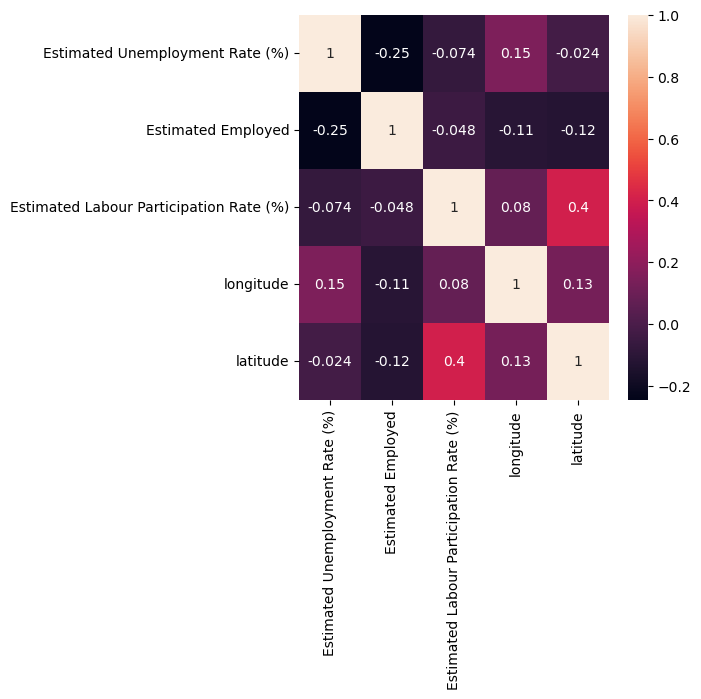

In [64]:
df.columns = df.columns.str.strip()

# Check the data types of columns in the dataset
print(df.dtypes)

# Convert necessary columns to appropriate data types
# Ensure 'Estimated Unemployment Rate (%)' and 'Estimated Employed' are numeric
df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'], errors='coerce')
df['Estimated Employed'] = pd.to_numeric(df['Estimated Employed'], errors='coerce')

# Plot a heatmap of correlations between numerical variables
plt.figure(figsize=(5, 5))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.show()

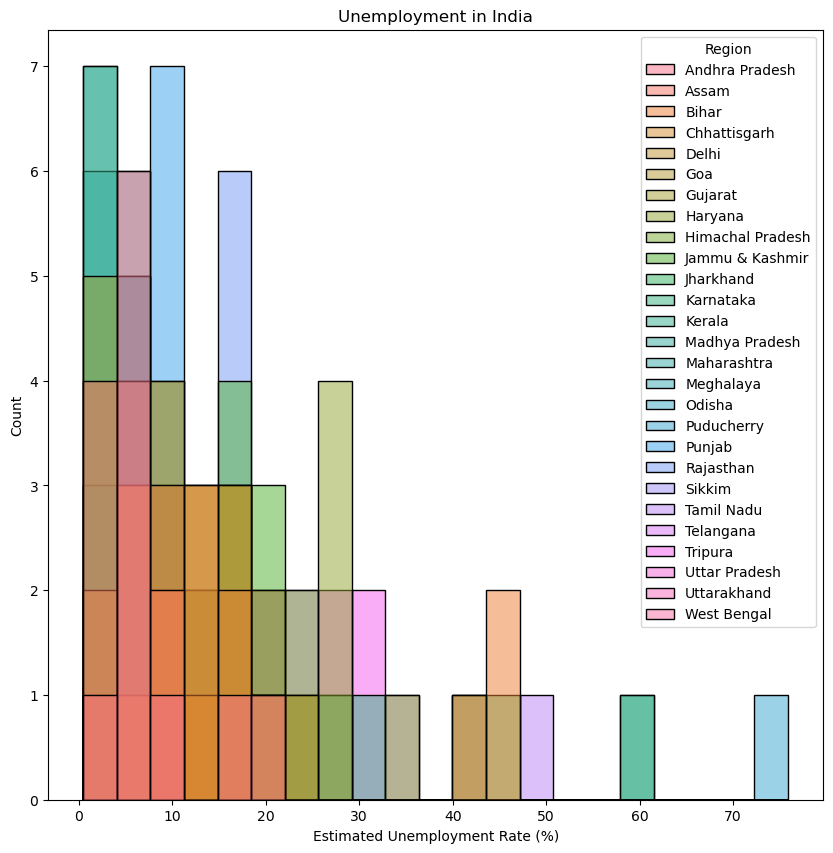

In [65]:
# Plot a histogram of estimated unemployment rates by region
plt.figure(figsize=(10, 10))
plt.title("Unemployment in India")
sns.histplot(x='Estimated Unemployment Rate (%)', hue="Region", data=df, kde=False)
plt.show()

<Axes: xlabel='month', ylabel='Estimated Unemployment Rate (%)'>

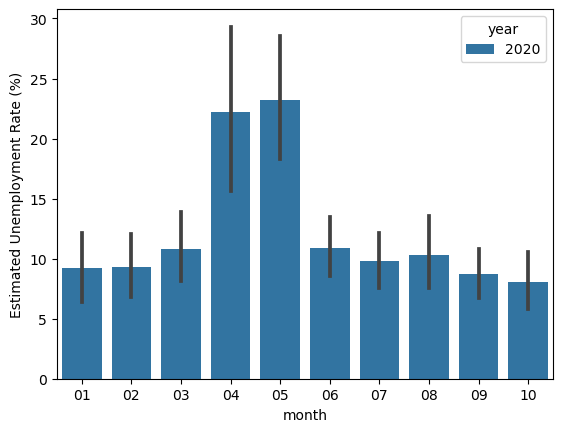

In [66]:
# Plot a barplot of estimated unemployment rates by month and year
sns.barplot(x='month', y='Estimated Unemployment Rate (%)', hue='year', data=df)

<Axes: xlabel='day', ylabel='Estimated Unemployment Rate (%)'>

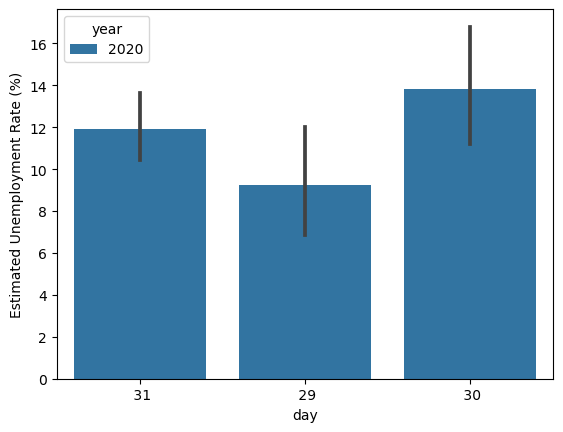

In [67]:
# Plot a barplot of estimated unemployment rates by day and year
sns.barplot(x='day', y='Estimated Unemployment Rate (%)', hue='year', data=df)

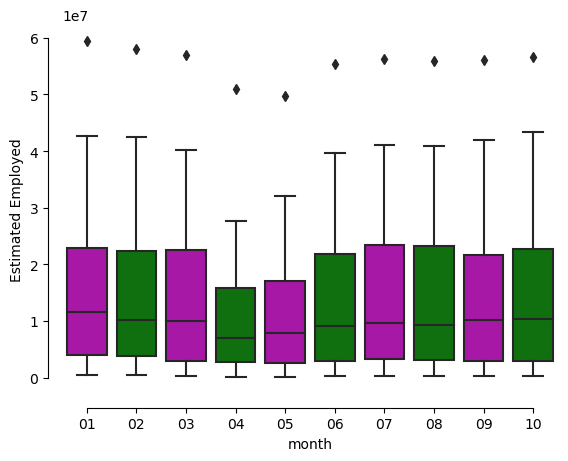

In [68]:
# Plot a nested boxplot to show employed estimates by month
sns.boxplot(x="month", y='Estimated Employed', palette=["m", "g"], data=df)
sns.despine(offset=10, trim=True)

<Axes: title={'center': 'Unemployment in India'}, xlabel='month', ylabel='Estimated Unemployment Rate (%)'>

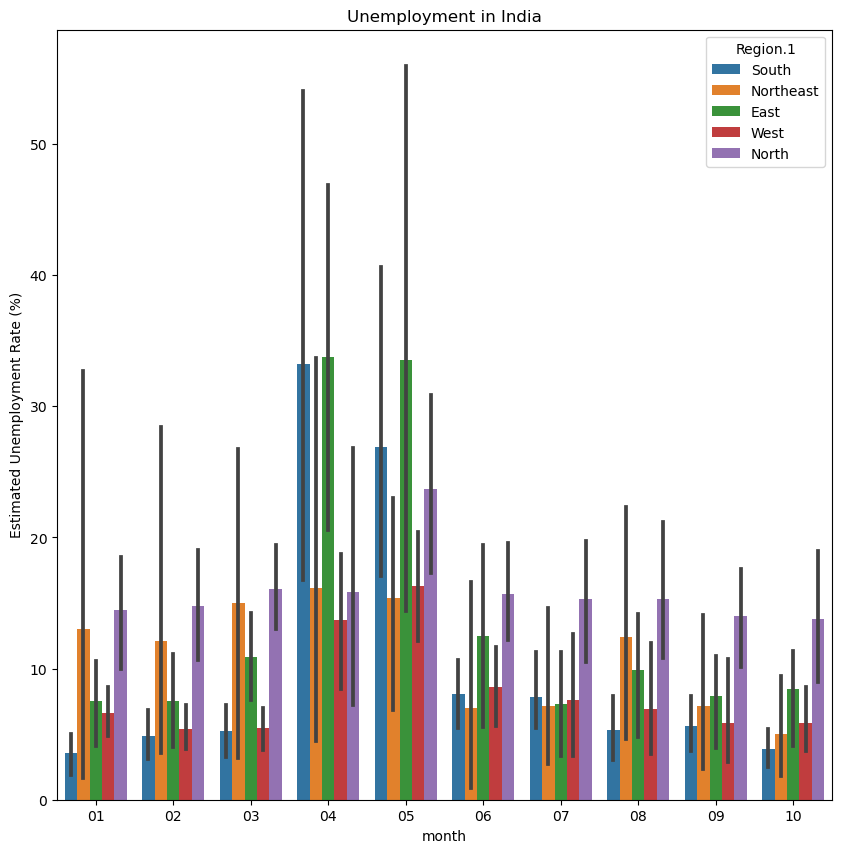

In [69]:
# Plot a barplot of estimated unemployment rates by month and region
plt.figure(figsize=(10, 10))
plt.title("Unemployment in India")
sns.barplot(x='month', y='Estimated Unemployment Rate (%)', hue='Region.1', data=df)

<Axes: title={'center': 'Unemployment in India'}, xlabel='day', ylabel='Estimated Unemployment Rate (%)'>

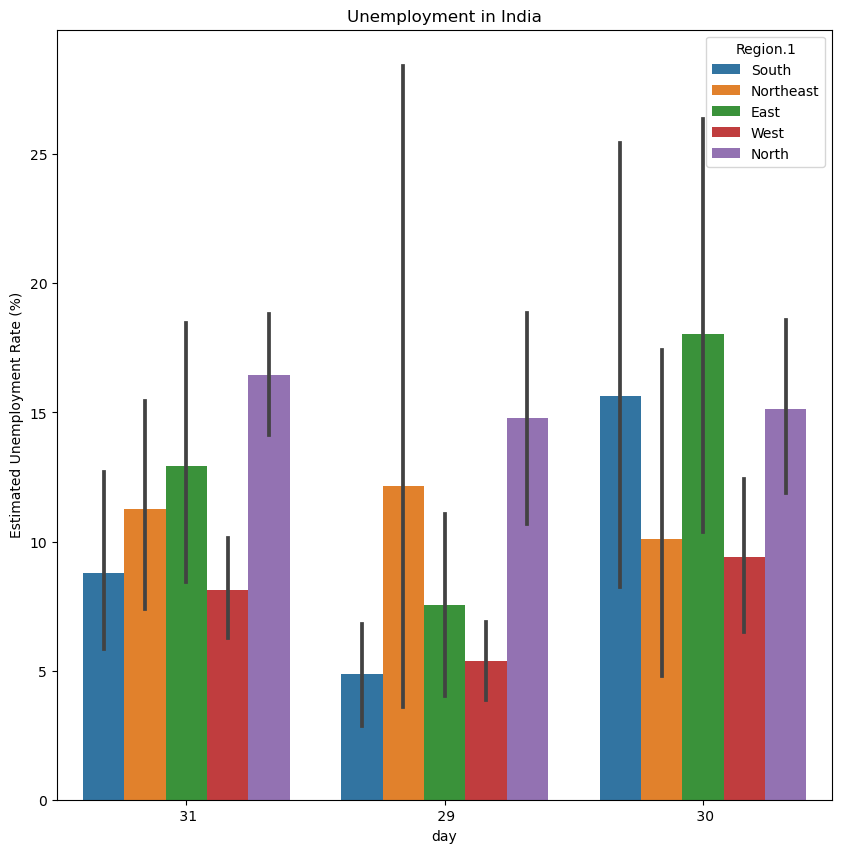

In [70]:
# Plot a barplot of estimated unemployment rates by day and region
plt.figure(figsize=(10, 10))
plt.title("Unemployment in India")
sns.barplot(x='day', y='Estimated Unemployment Rate (%)', hue='Region.1', data=df)

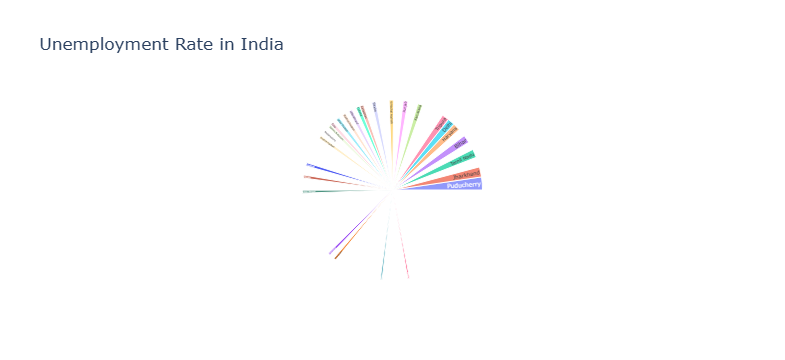

In [71]:
# Plot a sunburst chart of unemployment rates by region
unemployment = df[["Region",'Estimated Unemployment Rate (%)']]
fig = go.Figure(go.Sunburst(
    labels=unemployment['Region'],
    parents=[""] * len(unemployment),
    values=unemployment['Estimated Unemployment Rate (%)'],
))
fig.update_layout(title_text="Unemployment Rate in India")
fig.show()

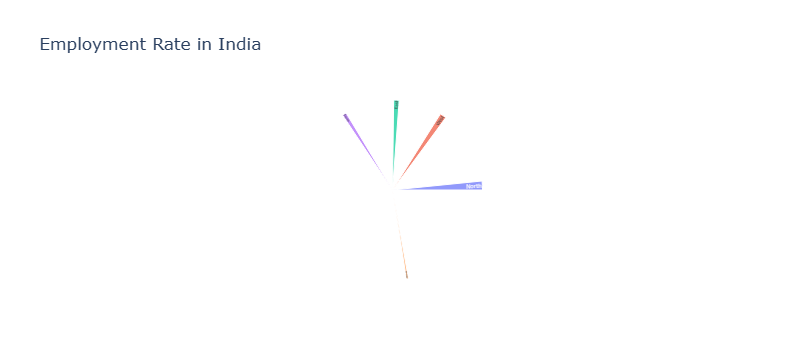

In [72]:
# Plot a sunburst chart of employment rates by region
employment = df[["Region.1",'Estimated Employed']]
fig = go.Figure(go.Sunburst(
    labels=employment['Region.1'],
    parents=[""] * len(employment),
    values=employment['Estimated Employed'],
))
fig.update_layout(title_text="Employment Rate in India")
fig.show()